In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

In [3]:
os.getenv("PUI2016")

'/home/cusp/ys2808/PUI2016'

In [4]:
os.getenv("PUIDATA")

'/home/cusp/ys2808/PUIdata'

## IDEA : less people use citi bike in morning rush hour (7am-10am) than afternoon rush hour (4pm-7pm)

## NULL HYPOTHESIS: the total amount of citi bike usages during 4pm-7pm is less than 7am-10am

$ H_0: Amount_m \ge Amount_a $

$ H_1: Amount_m \le Amount_a $

#### I will use a significance level  $\alpha=0.05$

In [5]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mkdir " + os.getenv("PUIDATA"))
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA"))
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
datestring = '201601'
getCitiBikeCSV(datestring)

('Downloading', '201601')
file in place, you can continue


In [9]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv',parse_dates=["starttime"])
# df is the dataframe where the content of the csv file is stored
df.head()
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,2016-01-01 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,2016-01-01 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,2016-01-01 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,2016-01-01 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,2016-01-01 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [10]:
df['time']=df['starttime'].apply(lambda x : x.time())

In [11]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,923,2016-01-01 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,00:00:41
1,379,2016-01-01 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,00:00:45
2,589,2016-01-01 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,00:00:48
3,889,2016-01-01 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,00:01:06
4,1480,2016-01-01 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,00:01:12
5,332,2016-01-01 00:01:19,1/1/2016 00:06:51,3104,Kent Ave & N 7 St,40.720577,-73.961502,389,Broadway & Berry St,40.710446,-73.965251,15788,Subscriber,1984.0,1,00:01:19
6,2321,2016-01-01 00:01:27,1/1/2016 00:40:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3164,Columbus Ave & W 72 St,40.777057,-73.978985,24183,Subscriber,1963.0,1,00:01:27
7,694,2016-01-01 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1,00:02:18
8,1376,2016-01-01 00:03:12,1/1/2016 00:26:09,527,E 33 St & 2 Ave,40.744023,-73.976056,259,South St & Whitehall St,40.701221,-74.012342,23933,Subscriber,1963.0,1,00:03:12
9,615,2016-01-01 00:03:43,1/1/2016 00:13:59,432,E 7 St & Avenue A,40.726218,-73.983799,311,Norfolk St & Broome St,40.717227,-73.988021,23993,Subscriber,1971.0,1,00:03:43


In [12]:
#format = '%H:%M:%S'
#df['time'] = pd.to_datetime(df['time'], format=format)
df = df.set_index(pd.DatetimeIndex(df['starttime']))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
2016-01-01 00:00:41,923,2016-01-01 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,00:00:41
2016-01-01 00:00:45,379,2016-01-01 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,00:00:45
2016-01-01 00:00:48,589,2016-01-01 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,00:00:48
2016-01-01 00:01:06,889,2016-01-01 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,00:01:06
2016-01-01 00:01:12,1480,2016-01-01 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,00:01:12


In [13]:
a_morning={}
for i in range(7,11):
    start = datetime.time(i,0,0)
    end = datetime.time(i+1,0,0)
    a_morning[i]=df['time'].between_time(start,end).count()
a_morning

{7: 23846, 8: 45142, 9: 35557, 10: 22797}

In [14]:
a_afternoon={}
for i in range(16,20):
    start = datetime.time(i,0,0)
    end = datetime.time(i+1,0,0)
    a_afternoon[i]=df['time'].between_time(start,end).count()
a_afternoon 

{16: 36777, 17: 48857, 18: 45890, 19: 31311}

In [116]:
morning=pd.DataFrame(a_morning,index=['morning']).T
morning

,morning
7,23846
8,45142
9,35557
10,22797


In [117]:
afternoon=pd.DataFrame(a_afternoon,index=['afternoon']).T
afternoon

,afternoon
16,36777
17,48857
18,45890
19,31311


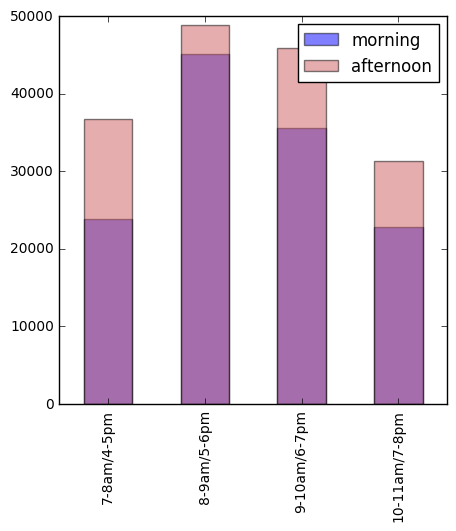

In [126]:
fig=plt.figure(figsize(5,5))
m=morning.plot(kind='bar',legend='morning',alpha=0.5)
a=afternoon.plot(kind='bar',legend='afternoon',alpha=0.5,ax=m,color='indianred')
m.xaxis.set_ticklabels(['7-8am/4-5pm','8-9am/5-6pm','9-10am/6-7pm','10-11am/7-8pm'], fontsize=10)

In [149]:
norm_m=morning.sum()
norm_a=afternoon.sum()
error_m = np.sqrt(morning)
error_a = np.sqrt(afternoon)


In [120]:
morning/norm_m

,morning
7,0.187260
8,0.354494
9,0.279224
10,0.179022


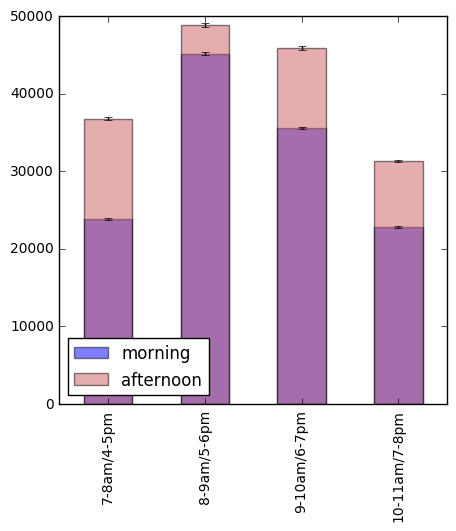

In [140]:
fig=plt.figure(figsize(5,5))
error_m=np.array(error_m)
##### yerr() includes an array, but error_a is a dataframe, two solutions as below:
merr=morning.plot(kind='bar',alpha = 0.5,yerr=[(error_m,error_m)])
aerr=afternoon.plot(kind='bar',yerr=[(error_a['afternoon'],error_a['afternoon'])],alpha=0.5,ax=merr,color='indianred')
merr.xaxis.set_ticklabels(['7-8am/4-5pm','8-9am/5-6pm','9-10am/6-7pm','10-11am/7-8pm'], fontsize=10)

In [150]:
error_a=np.array(error_a)
error_m=np.array(error_m)

error_m /= norm_m
error_a /= norm_a

array([[ 0.00117772],
       [ 0.00135742],
       [ 0.00131556],
       [ 0.00108668]])

In [153]:
error_a

array([[ 0.00117772],
       [ 0.00135742],
       [ 0.00131556],
       [ 0.00108668]])

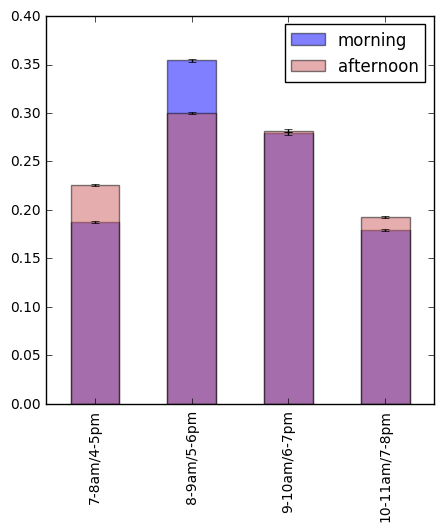

In [171]:
fig=plt.figure(figsize(5,5))


mnorm=(morning/norm_m).plot(kind='bar',alpha = 0.5,yerr=[(error_m,error_m)])
anorm=(afternoon/norm_a).plot(kind='bar',yerr=[(error_a,error_a)],alpha=0.5,ax=mnorm,color='indianred')
mnorm.xaxis.set_ticklabels(['7-8am/4-5pm','8-9am/5-6pm','9-10am/6-7pm','10-11am/7-8pm'], fontsize=10)

In [193]:
morning_mean=morning.mean()
afternoon_mean=afternoon.mean()
morning_mean=np.array(morning_mean)
afternoon_mean=np.array(afternoon_mean)

morning_mean_norm=(morning/norm_m).mean()
afternoon_mean_norm=(afternoon/norm_a).mean()
morning_mean_norm=np.array(morning_mean_norm)
afternoon_mean_norm=np.array(afternoon_mean_norm)


err_morning_norm = np.sqrt(morning_mean) / norm_m
err_afternoon_norm = np.sqrt(afternoon_mean) / norm_a

In [194]:
err_morning_norm

morning    0.001401
dtype: float64

In [195]:
err_afternoon_norm

afternoon    0.001239
dtype: float64

([], <a list of 0 Text xticklabel objects>)

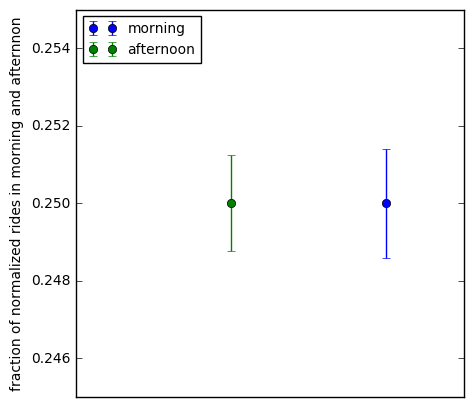

In [199]:
normal_m=np.array(morning/norm_m)
plt.errorbar([0.4], [morning_mean_norm], yerr=[err_morning_norm], fmt='o', label='morning')
plt.errorbar([0.2], [afternoon_mean_norm], yerr=[err_afternoon_norm], fmt='o', label='afternoon')
plt.ylabel("fraction of normalized rides in morning and afternnon", fontsize = 10)
plt.xlim(0, 0.5)
plt.ylim(0.245,0.255)
plt.legend(fontsize = 10, loc = "upper left")
plt.xticks([])
#plt.show()